In [1]:
import scipy as scp 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

params = {'image.aspect':'equal',
          'savefig.dpi':600,
          'axes.grid':True,
          'axes.grid.which':"both",
          'font.size':12,
          'text.usetex':True,
          'text.color':'black',
          'image.cmap':'viridis'}
mpl.rcParams.update(params)

F = scp.constants.physical_constants["Faraday constant"][0]
n = 0.92
D = 1.28e-6
Pa233 = 1e14 / scp.constants.Avogadro
U = 2.114e20 / scp.constants.Avogadro

In [2]:
def SandsLaw(concentration, area, current):
    top = n * F * area * concentration * np.sqrt(np.pi * D)
    bottom = 2 * current
    return (top / bottom ) **2

In [3]:
current = 0.12
area = np.linspace(0.23,2,3)

def conc(C0, SA, I):
    tau = SandsLaw(C0, SA, I)
    print(np.log(2)/tau)
    t = np.linspace(1,100,1000)
    return t, C0 * np.exp(-t * tau)

193.29740424919314
8.22492524264097
2.5563581711955794


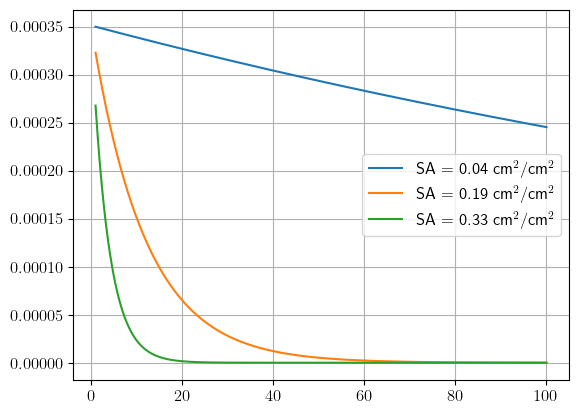

In [4]:
for a in area:
    t, C = conc(U, a, current)
    plt.plot(t, C, label = f"SA = {(a/6):10.2f} " + "cm$^2$/cm$^2$")
plt.legend()

In [5]:
def conc(C0, I, percent):
    areas = np.linspace(0.01, 6,1000)
    taus = np.array([SandsLaw(C0, a, I) for a in areas])
    return areas, np.log(1/(1-percent))/taus

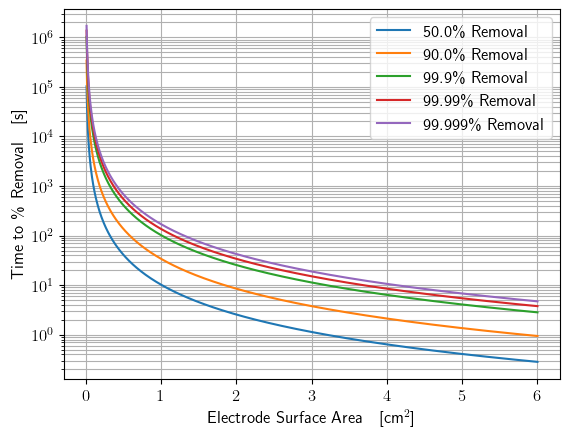

In [16]:
percent = [0.5, 0.9, 0.999, 0.9999, 0.99999]
for per in percent:
    a, times = conc(U, current, per)
    plt.semilogy(ua, times, label = f'{per*100:.5}\% Removal')
plt.ylabel(f"Time to \%\, Removal\quad [s]")
plt.xlabel("Electrode Surface Area\quad [cm$^2$]")
plt.legend()
plt.savefig("utime.png", dpi=600)
plt.show()

In [17]:
a2t = scp.interpolate.interp1d(a, times, 3)
t2a = scp.interpolate.interp1d(times, a, 3)

In [18]:
t2a(20)

array(2.91411016)

In [11]:
def func(t):
    md = 9.48e7 / 3600 * 0.45359237
    D = 1.28e-6/1e-4
    rho = 3330.4
    return np.sqrt(D/ t), md * t**2 / (4 * rho * D)
    
func(100)

(np.float64(0.01131370849898476), 700495.2880018792)

In [26]:
def func(w, t, scale = 1):
    md = 9.48e7 / 3600 * 0.45359237
    D = 1.28e-6/1e-4
    rho = 3330.4
    A = t2a(t)
    L = np.sqrt(D / t)
    print(L)
    r = L / np.pi * (w * scale / A - 1 / np.pi) **(-1)
    n = A / 2 / np.pi /r
    return n, r

In [27]:
func(2, 60, scale = 5)

0.01460593486680443


(np.float64(323.9934898932081), np.float64(0.0008264739808179585))